In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sys
import matplotlib.pyplot as plt
import numpy as np

In [9]:
sys.path.append("src")
from mean import Kmeans

In [10]:
df = pd.read_csv("data/income.csv").dropna()
df.tail()

,iq,income
50,135.0,69463.39893
51,136.0,70502.08506
52,137.0,70732.74270
53,138.0,61856.77370
54,139.0,66271.24048


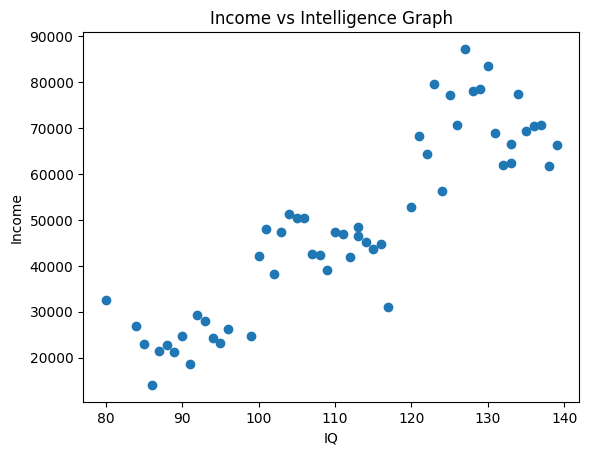

In [11]:
data = df.values.tolist()
axes = plt.axes()
axes.set_xlabel("IQ")
axes.set_ylabel("Income")
axes.set_title("Income vs Intelligence Graph")
plt.scatter(df["iq"], df["income"])


In [12]:
KmeanModel = Kmeans(k=3)
scale = StandardScaler()

# Data is scaled so that variables with naturally less numeric value do not get drowned by those with high numeric value
# see INCOME vs IQ here, income is a lot larger than age and so it's high numeric value will dominate poor iq

scaled_data = list(map(tuple, scale.fit_transform(data)))  #scale returns numpy array but this code works only on python list
KmeanModel.fit(scaled_data)


# the data is descaled for plotting purposes (so that the axes dont go from -1 $ to 1 $)
iq_center, income_center = zip(*(scale.inverse_transform(KmeanModel.centroids)))  




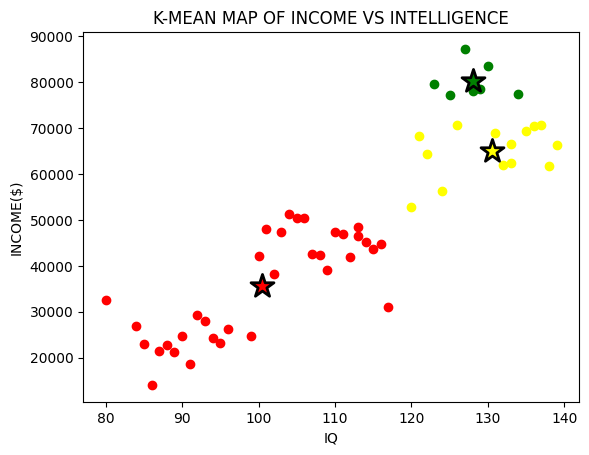

In [13]:
axes = plt.axes()
axes.set_title("K-MEAN MAP OF INCOME VS INTELLIGENCE")
axes.set_xlabel("IQ")
axes.set_ylabel("INCOME($)")
colors = ["Red", "Yellow", "Green"]



for i, point in enumerate(data):
    cluster_index = KmeanModel.predict(scaled_data[i])
    plt.scatter(point[0], point[1], color = colors[cluster_index])
    

for i in range(np.size(iq_center)):
    plt.scatter(iq_center[i], income_center[i],  
                marker='*', 
                s=300, 
                c=colors[i], 
                edgecolors='black', 
                linewidths=2, )